In [1]:
'''
BT18CSE028 Aditya Dhane

Image locations: Same folder as the jupyter notebook

''' 

'\nBT18CSE028 Aditya Dhane\n\nImage locations: Same folder as the jupyter notebook\n\n'

1Q. Develop a program that would use appropriate hand coded morphological operations to enhance the given fingerprint.png image as the resultant output image.

Text(0.5, 1.0, 'kernel')

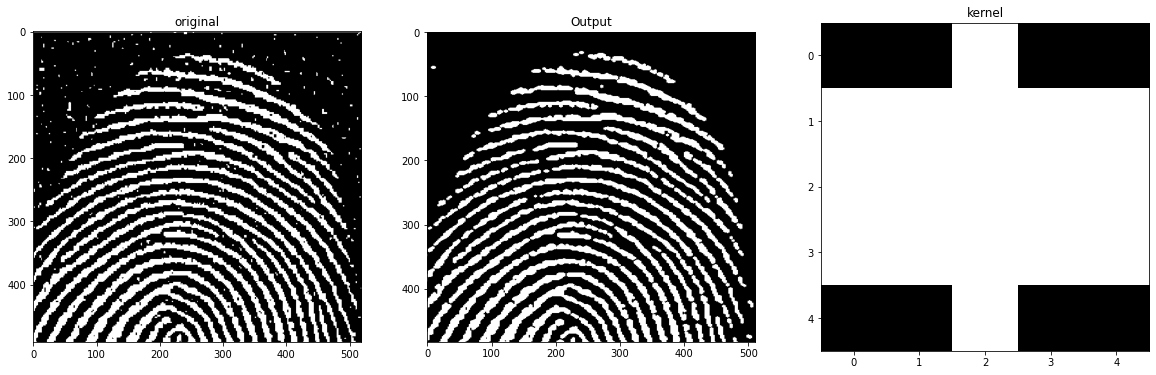

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('images\\fingerprint.png',0)
img = cv2.threshold(img,128,1,cv2.THRESH_BINARY)[1]

# Erosion of img by kernel
def erode(img,kernel):
    kx = kernel.shape[0]
    ky = kernel.shape[1]
    res = np.zeros((img.shape[0]-kx+1,img.shape[1]-ky+1),dtype=np.uint8)

    count = np.count_nonzero(kernel)                # count of non zero element in kernel

    for i in range(0,res.shape[0]):
        for j in range(0,res.shape[1]):
            mat = img[i:i+kx,j:j+ky]                # Surroding area of pixel

            mul = mat * kernel;                     # dot multiplication with kernel
            if np.count_nonzero(mul) == count:       # Fit operation
                res[i,j] = 1

    return res;

# Dilution of img by kernel
def dilate(img,kernel):
    kx = kernel.shape[0]
    ky = kernel.shape[1]
    res = np.zeros((img.shape[0]-kx+1,img.shape[1]-ky+1),dtype=np.uint8)

    for i in range(0,res.shape[0]):
        for j in range(0,res.shape[1]):
            mat = img[i:i+kx,j:j+ky]       # Surroding area of pixel

            mul = mat * kernel;            # dot multiplication with kernel
            if np.count_nonzero(mul) > 0:  # Hit operation
                res[i,j] = 1

    return res;

# get circular structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

# Open operation = erosion followed by dilation
res = erode(img,kernel)
res = dilate(res,kernel)

plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.subplot(1,3,2)
plt.imshow(res,cmap='gray')
plt.title('Output')
plt.subplot(1,3,3)
plt.imshow(kernel,cmap='gray')
plt.title('kernel')

2Q. Implement a program to count the number of disks in the image disks.png, which has a number of touching black disks on a white background.

Number of Disks: 14


Text(0.5, 1.0, 'Connected components')

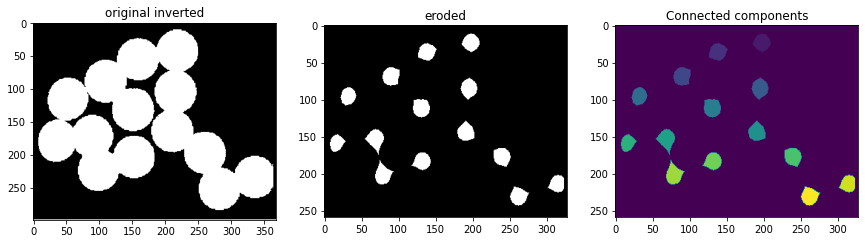

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('images\\disks.png',0)
img = cv2.threshold(img,128,1,cv2.THRESH_BINARY_INV)[1]

# Erosion of img by kernel
def erode(img,kernel):
    kx = kernel.shape[0]
    ky = kernel.shape[1]
    res = np.zeros((img.shape[0]-kx+1,img.shape[1]-ky+1),dtype=np.uint8)

    count = np.count_nonzero(kernel)                # count of non zero element in kernel

    for i in range(0,res.shape[0]):
        for j in range(0,res.shape[1]):
            mat = img[i:i+kx,j:j+ky]                # Surroding area of pixel

            mul = mat * kernel;                     # dot multiplication with kernel
            if np.count_nonzero(mul) == count:       # Fit operation
                res[i,j] = 1

    return res;

# get structuring element
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(41,41))

res = erode(img,kernel)

# Get number of connected components
count, res1 = cv2.connectedComponents(res,connectivity = 8)
print('Number of Disks: '+str(count - 1))

plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(img,cmap='gray')
plt.title('original inverted')
plt.subplot(1,4,2)
plt.imshow(res,cmap='gray')
plt.title('eroded')
plt.subplot(1,4,3)
plt.imshow(res1)
plt.title('Connected components')

3Q. The task here is to help a robot to identify a bright orange ball in its surrounding. The ball.bmp is an image obtained from a camera mounted on the robot. 
a) Implement a Myrgb2hsi function to convert red-green-blue (RGB) colors to hue saturation intensity (HSI). The function prototype should be: 
	function [H, S, I] = Myrgb2hsi(Im) 
where Im is the original color image, and H, S, and I are the normalized hue value, saturation-value, and intensity value in the HSI color space, respectively. That is, H, S, and I should be in the range of [0, 1]. Load and convert ball.bmp to HSI color space by calling the Myrgb2hsi function. Display the three images in figures 1 to 3 with the appropriate titles. Call an appropriate OpenCV/Matlab function to do the similar conversion and display the three images (i.e., Hue, Saturation, and Intensity) in figures 4 to 6 with appropriate titles. Display the difference images between your results and the Matlab’s results in figures 7 to 9 with appropriate titles. Explain the reason for these differences and the visual differences between your results and the Matlab’s results. 
b) In H-space, find a threshold for the ball. Find the centroid of the ball and indicate its location by a cross on the original color image.

'\n    reason for these differences :\n            1)For HSV, hue range is [0,179], saturation range is [0,255], and value range is [0,255]. Different software use different scales.\n            2)Opencv has HSV instead of HSI thus formula of value is bit different than intensity\n\n'

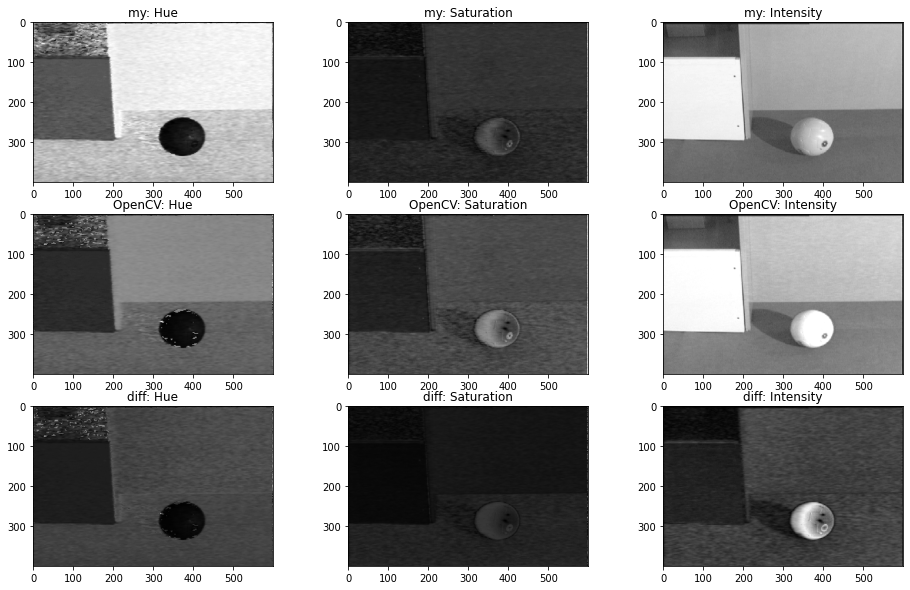

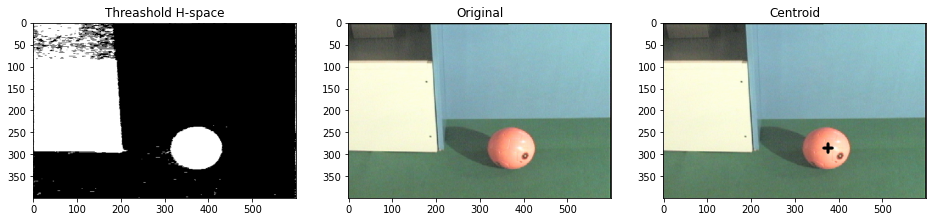

In [4]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import math

img = cv2.imread('images\\ball.bmp')

def Myrgb2hsi(img):
    with np.errstate(divide='ignore', invalid='ignore'):
        bgr = np.int32(cv2.split(img))
        b = bgr[0]
        g = bgr[1]
        r = bgr[2]

        # Hue Calculation
        sqrt_calc = np.sqrt(((r - g) * (r - g)) + ((r - b) * (g - b)))
        if (g >= b).any():
            hue = np.arccos((1/2 * ((r-g) + (r - b)) / sqrt_calc))
        else:
            hue = 2*pi - np.arccos((1/2 * ((r-g) + (r - b)) / sqrt_calc))

        # Saturation Calculation
        minimum = np.minimum(np.minimum(r, g), b)
        saturation = 1 - (3 / (r + g + b) * minimum)

        # Intensity Calculation
        intensity = (b + g + r) // 3

        # Normalizing hue and saturation to 0 to 255
        hue = cv2.normalize(hue, None, 0, 179, cv2.NORM_MINMAX, cv2.CV_8U)  
        saturation = cv2.normalize(saturation, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
        return hue,saturation,intensity

# My function
h,s,i = Myrgb2hsi(img)

plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
plt.imshow(h,cmap='gray')
plt.title('my: Hue')
plt.subplot(3,3,2)
plt.imshow(s,cmap='gray')
plt.title('my: Saturation')
plt.subplot(3,3,3)
plt.imshow(i,cmap='gray')
plt.title('my: Intensity')

# OpenCV HSV Function
hls = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h1,s1,i1 = cv2.split(hls)

plt.subplot(3,3,4)
plt.imshow(h1,cmap='gray')
plt.title('OpenCV: Hue')
plt.subplot(3,3,5)
plt.imshow(s1,cmap='gray')
plt.title('OpenCV: Saturation')
plt.subplot(3,3,6)
plt.imshow(i1,cmap='gray')
plt.title('OpenCV: Intensity')

plt.subplot(3,3,7)
plt.imshow(h-h1,cmap='gray')
plt.title('diff: Hue')
plt.subplot(3,3,8)
plt.imshow(s1-s,cmap='gray')
plt.title('diff: Saturation')
plt.subplot(3,3,9)
plt.imshow(i1-i,cmap='gray')
plt.title('diff: Intensity')

# Threshold on H space
hthresh = cv2.threshold(h,100,255,cv2.THRESH_BINARY_INV)[1]
res = cv2.cvtColor(hthresh,cv2.COLOR_GRAY2RGB)

img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img1 = cv2.GaussianBlur(img1,(5,5),0)

# Get circle co-ordinates
circles = cv2.HoughCircles(img1,cv2.HOUGH_GRADIENT,1,100,param1=50,param2=30,minRadius=0,maxRadius=0)
circles = np.uint16(np.around(circles))

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
centroid = img.copy()

# Draw Centroid
for i in circles[0,:]:
    size = 10
    cv2.line(centroid,(i[0],i[1]+size),(i[0],i[1]-size),(0,0,0),5)
    cv2.line(centroid,(i[0]+size,i[1]),(i[0]-size,i[1]),(0,0,0),5)


plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
plt.imshow(hthresh,cmap='gray')
plt.title('Threashold H-space')
plt.subplot(1,3,2)
plt.imshow(img)
plt.title('Original')
plt.subplot(1,3,3)
plt.imshow(centroid)
plt.title('Centroid')

'''
    reason for these differences :
            1)For HSV, hue range is [0,179], saturation range is [0,255], and value range is [0,255]. Different software use different scales.
            2)Opencv has HSV instead of HSI thus formula of value is bit different than intensity

'''

4Q. Develop a function to implement Harris corners detection algorithm. Use the function to detect corner points in the given corner_test.png image. Compare the hand crafted function result with built in cv2.cornerHarris() function result to test your code.

Text(0.5, 1.0, 'my: Harris detector')

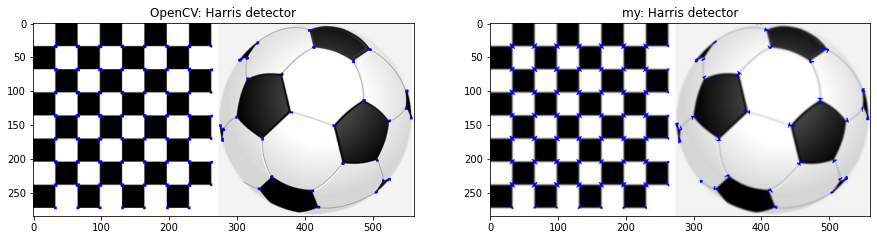

In [5]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

img = cv2.imread('images\\corner_test.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# OpenCV Harris corner detection
gray = np.float32(gray)
dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)
res1 = img.copy()
res1[dst>0.01*dst.max()]=[0,0,255]

# Harris corner detection fucntion
def harrisCornerDetector(img, window_size, k, thresh):      # k: harris corner constant
    # Find x and y derivatives
    dy, dx = np.gradient(img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    h = img.shape[0]
    w = img.shape[1]

    res = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    z = int(window_size/2)

    # Loop through image and find our corners
    for y in range(z, h-z):
        for x in range(z, w-z):
            # Calculate sum of squares
            winIxx = Ixx[y-z:y+z+1, x-z:x+z+1]
            winIxy = Ixy[y-z:y+z+1, x-z:x+z+1]
            winIyy = Iyy[y-z:y+z+1, x-z:x+z+1]
            Sxx = winIxx.sum()
            Sxy = winIxy.sum()
            Syy = winIyy.sum()

            # get corner response
            r = Sxx * Syy - Sxy**2 - k*((Sxx + Syy)**2)

            # If corner response is over threshold, color the point
            if r > thresh:
                res[y, x] = [0,0,255]
    return res

gray = cv2.GaussianBlur(gray,(5,5),0)
res2 = harrisCornerDetector(gray,2,0.04,200).astype(int)

plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.imshow(res1,cmap='gray')
plt.title('OpenCV: Harris detector')
plt.subplot(1,2,2)
plt.imshow(res2,cmap='gray')
plt.title('my: Harris detector')

5Q. Write a program to perform robust image matchig using RANSAC algorithm and Harris Corner features. Use FM_img1.jpg and FM_img2.jpg to test the program.

<ipython-input-6-487ab860de5b>:127: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  theta = np.linalg.lstsq(M, b)[0]


Transformation Matrix: 
[[-1.00005003e+00 -1.59304858e-05  3.80508735e+02]
 [-3.81670239e-05 -1.00001115e+00  4.98508318e+02]]


Text(0.5, 1.0, 'Transforming Source->Target using Transformation matrix')

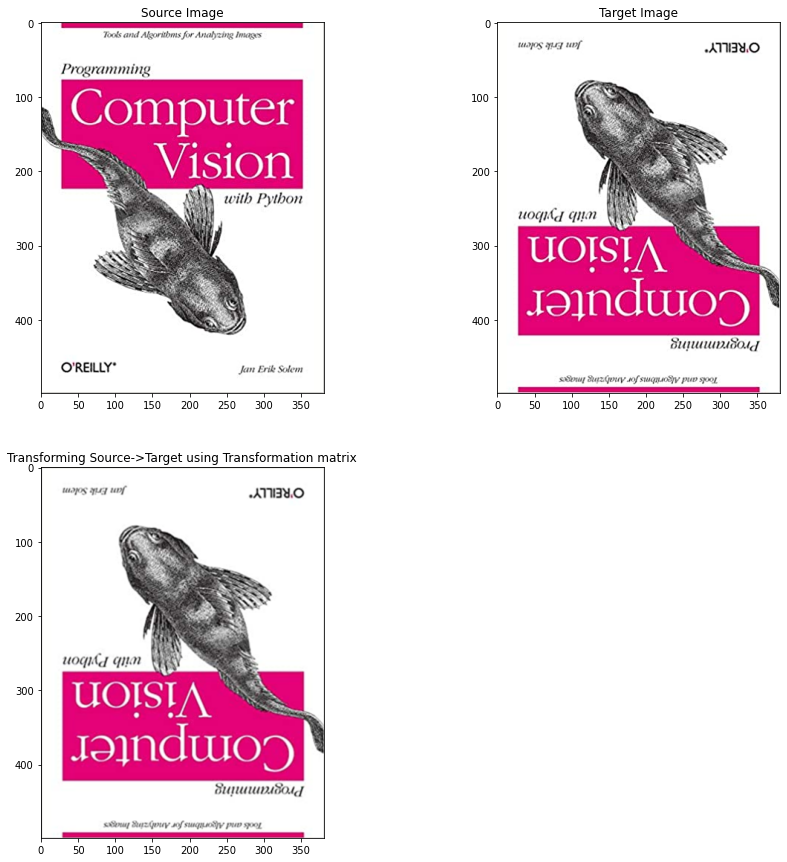

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

#  distance of second best match
RATIO = 0.8
# The number of iterations in RANSAC
ITER_NUM = 2000
ransac_k = 3
ransac_threshold = 1

def extract_SIFT( img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Extract key points and SIFT descriptors
    sift = cv2.SIFT_create()
    kp, desc = sift.detectAndCompute(img_gray, None)

    # Extract positions of key points
    kp = np.array([p.pt for p in kp]).T
    return kp, desc

def match_SIFT(desc_s, desc_t):
    # Match descriptor and obtain two best matches
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(desc_s, desc_t, k=2)

    # Initialize output variable
    fit_pos = np.array([], dtype=np.int32).reshape((0, 2))

    matches_num = len(matches)
    for i in range(matches_num):
        # Obtain the good match if the ration id smaller than 0.8
        if matches[i][0].distance <= RATIO * matches[i][1].distance:
            temp = np.array([matches[i][0].queryIdx,
                                matches[i][0].trainIdx])
            # Put points index of good match
            fit_pos = np.vstack((fit_pos, temp))
    return fit_pos

def affine_matrix(kp_s, kp_t, fit_pos):
    # Extract corresponding points from all key points
    kp_s = kp_s[:, fit_pos[:, 0]]
    kp_t = kp_t[:, fit_pos[:, 1]]

    # Apply RANSAC to find most inliers
    _, _, inliers = ransac_fit(kp_s, kp_t)

    # Extract all inliers from all key points
    kp_s = kp_s[:, inliers[0]]
    kp_t = kp_t[:, inliers[0]]

    # Use all inliers to estimate transform matrix
    A, t = estimate_affine(kp_s, kp_t)
    M = np.hstack((A, t))
    return M

def residual_lengths(A, t, pts_s, pts_t):
    if not(A is None) and not(t is None):
        # Calculate estimated points:
        # pts_esti = A * pts_s + t
        pts_e = np.dot(A, pts_s) + t

        # Calculate the residual length between estimated points
        # and target points
        diff_square = np.power(pts_e - pts_t, 2)
        residual = np.sqrt(np.sum(diff_square, axis=0))
    else:
        residual = None
    return residual

def ransac_fit(pts_s, pts_t):

    # Initialize the affine transformation A and t,
    # and a vector that stores indices of inliers
    A = None
    t = None
    inliers = None
    inliers_num = 0

    for i in range(ITER_NUM):
        # Randomly generate indices of points correspondences
        idx = np.random.randint(0, pts_s.shape[1], (ransac_k, 1))
        # Estimate affine transformation by these points
        A_tmp, t_tmp = estimate_affine(pts_s[:, idx], pts_t[:, idx])

        # Calculate the residual by applying estimated transformation
        residual = residual_lengths(A_tmp, t_tmp, pts_s, pts_t)

        if not(residual is None):
            # Obtain the indices of inliers
            inliers_tmp = np.where(residual < ransac_threshold)
            # Obtain the number of inliers
            inliers_num_tmp = len(inliers_tmp[0])

            # Set affine transformation and indices og inliers
            # in one iteration which has the most of inliers
            if inliers_num_tmp > inliers_num:
                # Update the number of inliers
                inliers_num = inliers_num_tmp
                # Set returned value
                inliers = inliers_tmp
                A = A_tmp
                t = t_tmp
    return A, t, inliers
    
def estimate_affine(pts_s, pts_t):
    # Get the number of corresponding points
    pts_num = pts_s.shape[1]

    # Initialize the matrix M,
    # M has 6 columns, since the affine transformation
    # has 6 parameters in this case
    M = np.zeros((2 * pts_num, 6))

    for i in range(pts_num):
        # Form the matrix m
        temp = [[pts_s[0, i], pts_s[1, i], 0, 0, 1, 0],
                [0, 0, pts_s[0, i], pts_s[1, i], 0, 1]]
        M[2 * i: 2 * i + 2, :] = np.array(temp,dtype=object)

    # Form the matrix b,
    # b contains all known target points
    b = pts_t.T.reshape((2 * pts_num, 1))
    
    # Solve the linear equation
    theta = np.linalg.lstsq(M, b)[0]

    # Form the affine transformation
    A = theta[:4].reshape((2, 2))
    t = theta[4:]

    return A, t

# Load source image and target image
img_source = cv2.imread('images\\FM_img1.jpg',1)
img_target = cv2.imread('images\\FM_img2.jpg',1)

# Extract key points and SIFT descriptors from
# source image and target image respectively
kp_s, desc_s = extract_SIFT(img_source)
kp_t, desc_t = extract_SIFT(img_target)

# Obtain the index of correcponding points
fit_pos = match_SIFT(desc_s, desc_t)

# Compute the affine transformation matrix
M = affine_matrix(kp_s, kp_t, fit_pos)

print('\n\nTransformation Matrix: ')
print(M)

# Warp the source image and display result
rows, cols, _ = img_target.shape
# Affine transformation on source
warp = cv2.warpAffine(img_source, M, (cols, rows))

img_source = cv2.cvtColor(img_source,cv2.COLOR_BGR2RGB)
img_target = cv2.cvtColor(img_target,cv2.COLOR_BGR2RGB)
result = cv2.cvtColor(warp,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(img_source)
plt.title('Source Image')
plt.subplot(2,2,2)
plt.imshow(img_target)
plt.title('Target Image')
plt.subplot(2,2,3)
plt.imshow(result)
plt.title('Transforming Source->Target using Transformation matrix')